# Moho Models
**Description:**  Moho topography from various sources. 

**Dataset:** 

N.A.

**Associated papers:**

Shen, Weisen, Douglas A. Wiens, Sridhar Anandakrishnan, Richard C. Aster, Peter Gerstoft, Peter D. Bromirski, Samantha E. Hansen, et al. “The Crust and Upper Mantle Structure of Central and West Antarctica from Bayesian Inversion of Rayleigh Wave and Receiver Functions.” Journal of Geophysical Research: Solid Earth 123, no. 9 (2018): 7824–49. https://doi.org/10.1029/2017JB015346.

An, Meijian, Douglas A. Wiens, Yue Zhao, Mei Feng, Andrew A. Nyblade, Masaki Kanao, Yuansheng Li, Alessia Maggi, and Jean-Jacques Lévêque. “S-Velocity Model and Inferred Moho Topography beneath the Antarctic Plate from Rayleigh Waves: Antarctic S-Velocities and Moho.” Journal of Geophysical Research: Solid Earth 120, no. 1 (2015): 359–83. https://doi.org/10.1002/2014JB011332.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, utils

In [2]:
version_names = [
    "shen-2018",
    "an-2015",
    # "pappa-2019",
]

grids = []
for name in version_names:
    data = fetch.moho(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for shen-2018
grid spacing: 10000.0 m
grid region: (-2800000.0, 2800000.0, -2800000.0, 2800000.0)
grid zmin: -57223.5273438
grid zmax: -17218.0996094
grid registration: g
##########


Info for an-2015


grid spacing: 5000.0 m
grid region: (-8055988.01606, 8059011.98394, -8059011.64301, 8055988.35699)
grid zmin: -65076.78125
grid zmax: -5629.39257812
grid registration: g
##########


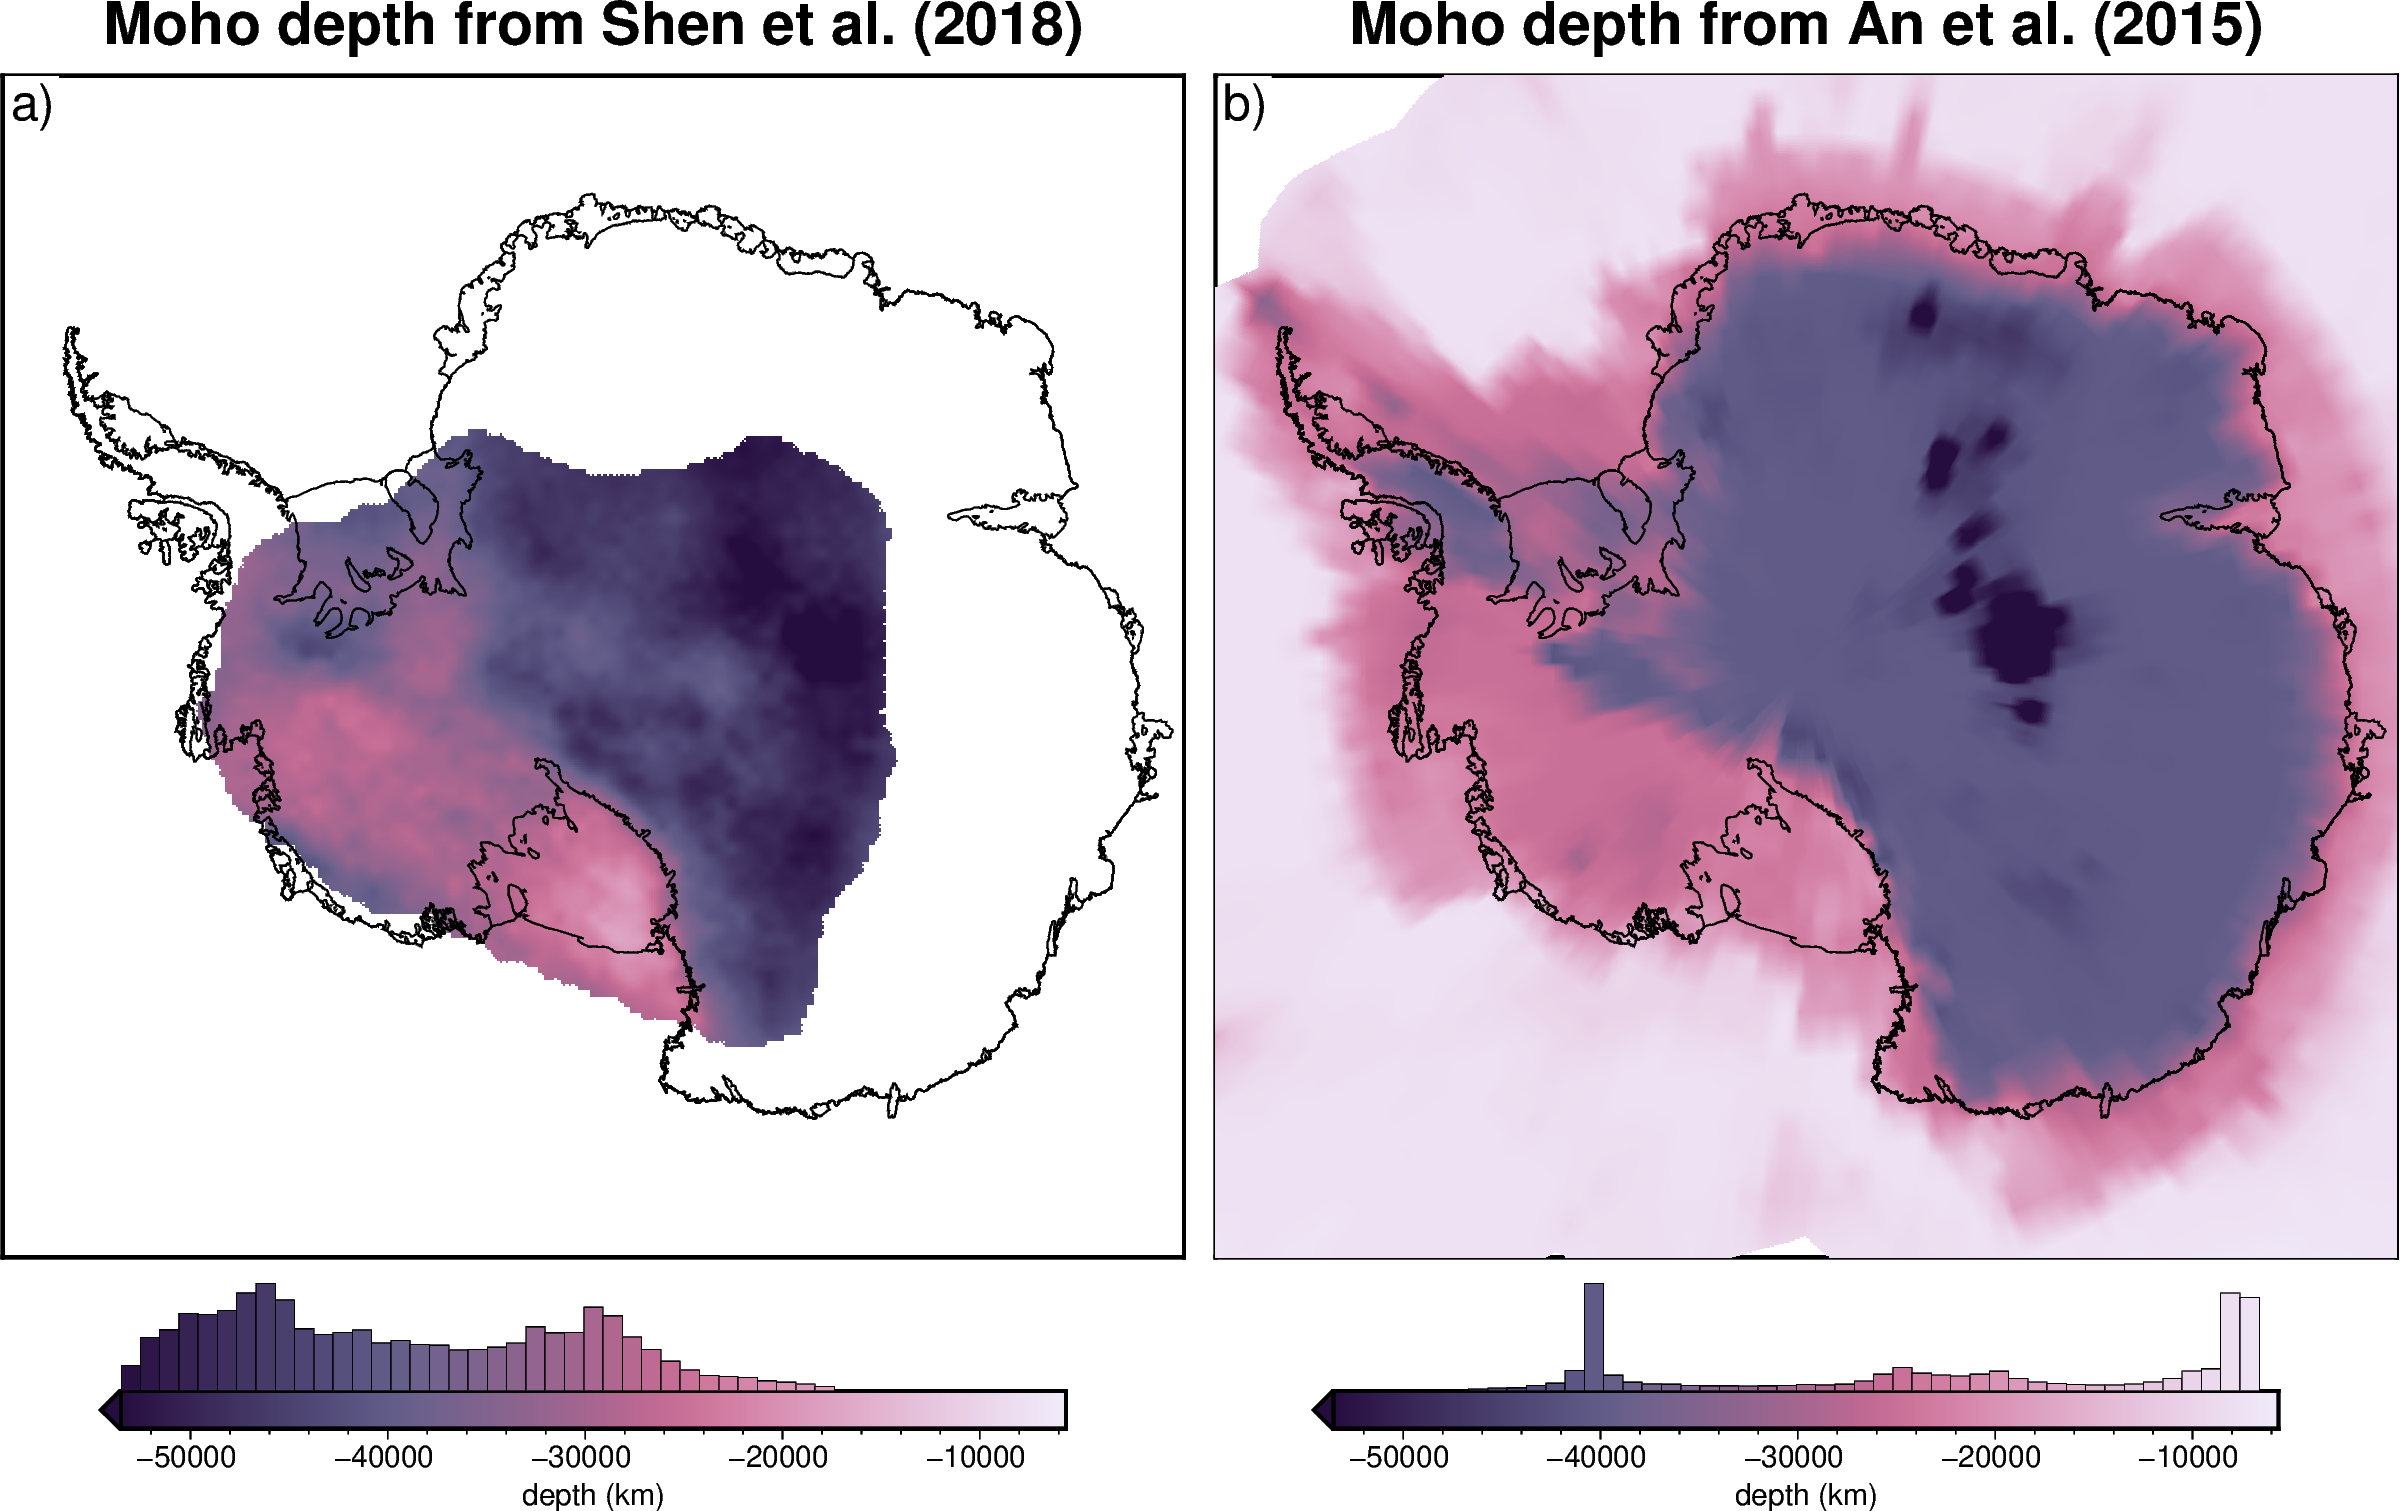

In [3]:
cpt_lims = utils.get_combined_min_max(grids, robust=True)

fig = maps.subplots(
    grids=grids,
    titles=[
        "Moho depth from Shen et al. (2018)",
        "Moho depth from An et al. (2015)",
    ],
    cmap="acton",
    cpt_lims=cpt_lims,
    cbar_label="depth (km)",
    hist=True,
    hemisphere="south",
    coast=True,
)
fig.show(dpi=200)